In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

from sklearn.preprocessing import StandardScaler, RobustScaler

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [68]:
df = pd.read_csv('C:\\Users\\Muhammad Hazim\\Desktop\\bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


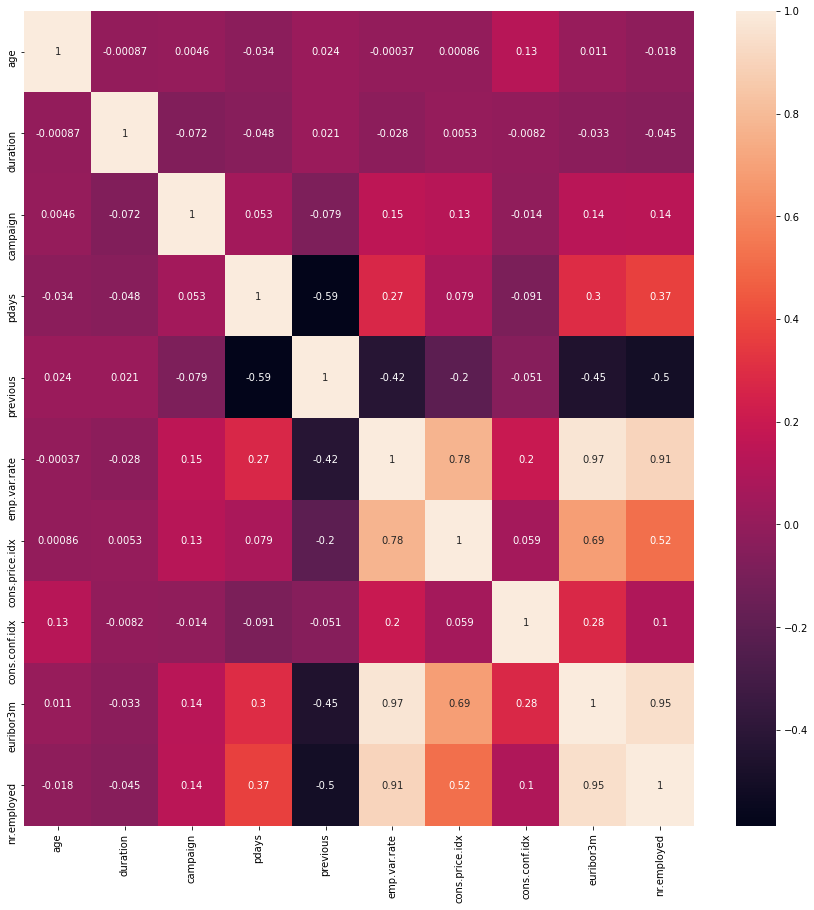

In [70]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True)

In [3]:
df.drop(['emp.var.rate', 'euribor3m'], axis = 1, inplace = True)

In [4]:
cat_feat = []

for column in df.columns.values:
    if (column != 'y') & (df[column].dtypes == 'O'):
        cat_feat.append(column)   
        
numd_feat = []

for column in df.columns.values:
    if (column != 'y') & (df[column].dtypes == 'int64'):
        numd_feat.append(column) 

numf_feat = []

for column in df.columns.values:
    if (column != 'y') & (df[column].dtypes == 'float64'):
        numf_feat.append(column) 

In [5]:
def plot_bar(column):
    table = pd.DataFrame()
    table['No_deposit'] = df[df['y'] == 'no'][column].value_counts()
    table['Yes_deposit'] = df[df['y'] == 'yes'][column].value_counts()
    table.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show();

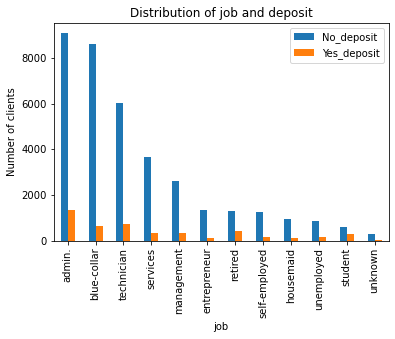

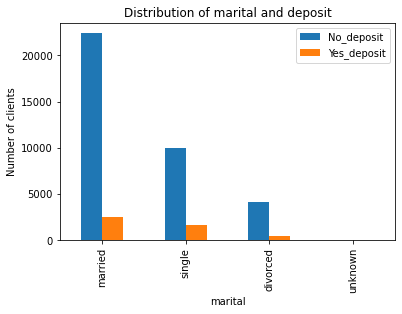

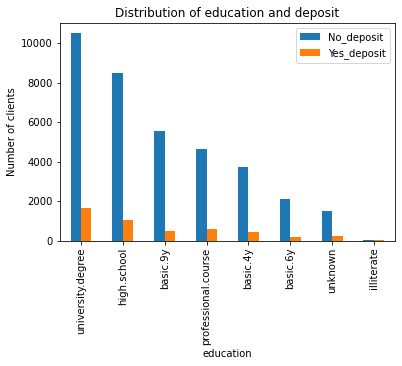

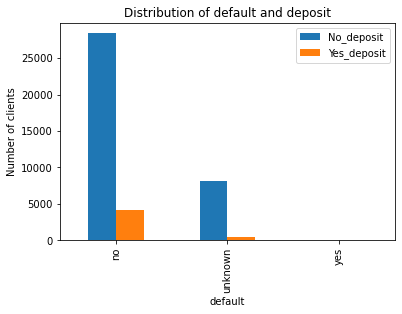

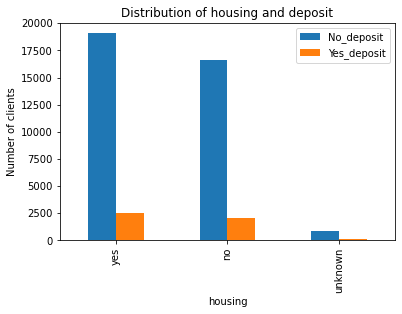

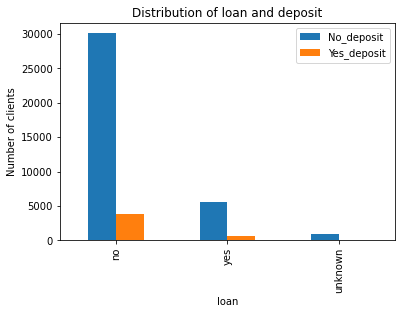

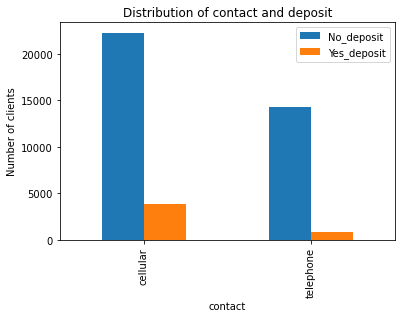

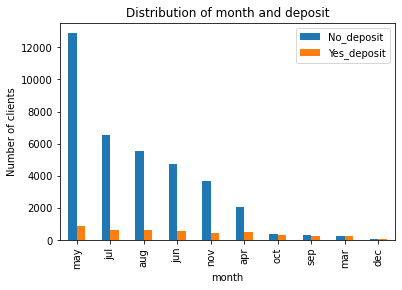

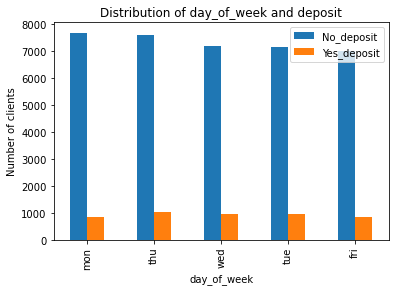

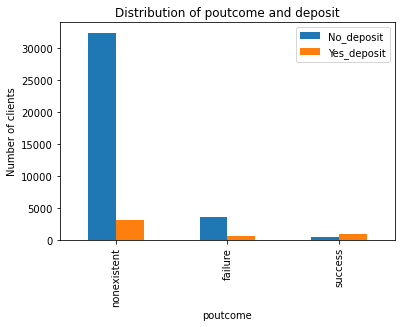

In [6]:
for column in cat_feat:
    plot_bar(column)

In [7]:
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [8]:
df.marital = df.marital.map({'married': 1, 'single':0, 'divorced':0, 'unknown':0})
df.education = df.education.map({'basic.4y':0, 'high.school':0, 'basic.6y':0, 'basic.9y':0,
       'professional.course':1, 'unknown':0, 'university.degree':1,
       'illiterate':0})
df.default = df.default.map({'no':0, 'unknown':0, 'yes':1})
df.contact = df.contact.map({'cellular': 0, 'telephone':1})

In [9]:
df.pdays = df.pdays.replace(999,0)
df.y = df.y.map({'no': 0, 'yes': 1})

In [10]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

In [11]:
numd_feat

['age', 'duration', 'campaign', 'pdays', 'previous']

In [12]:
df['age'] = std_scaler.fit_transform(df['age'].values.reshape(-1,1))

In [13]:
df['duration'] = df['duration']/60

In [14]:
df['duration'] = rob_scaler.fit_transform(df['duration'].values.reshape(-1,1))

In [15]:
df['campaign'] = rob_scaler.fit_transform(df['campaign'].values.reshape(-1,1))

In [16]:
df['pdays'] = rob_scaler.fit_transform(df['pdays'].values.reshape(-1,1))

In [17]:
df.loc[df['previous'] == 0, 'previous'] = 0
df.loc[df['previous'] > 0, 'previous'] = 1

In [18]:
numf_feat

['cons.price.idx', 'cons.conf.idx', 'nr.employed']

In [19]:
df['cons.price.idx'] = std_scaler.fit_transform(df['cons.price.idx'].values.reshape(-1,1))

In [20]:
df['cons.conf.idx'] = std_scaler.fit_transform(df['cons.conf.idx'].values.reshape(-1,1))

In [21]:
df['nr.employed'] = rob_scaler.fit_transform(df['nr.employed'].values.reshape(-1,1))

In [22]:
df = pd.get_dummies(df, drop_first = True)

In [23]:
x = df.drop("y", axis=1)
y = df["y"]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [25]:
def score(model):
    df1 = pd.DataFrame(index = ['Accuracy', 'Precision', 'ROC AUC'] )
    df1['Train Score'] = [accuracy_score(y_train, model.predict(x_train)), precision_score(y_train, model.predict(x_train)), roc_auc_score(y_train, model.predict_proba(x_train)[:,1])]
    df1['Test Score'] = [accuracy_score(y_test, model.predict(x_test)), precision_score(y_test, model.predict(x_test)), roc_auc_score(y_test, model.predict_proba(x_test)[:,1])]        
    return df1

In [26]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [27]:
score(lr)

,Train Score,Test Score
Accuracy,0.909226,0.913450
Precision,0.657630,0.693694
ROC AUC,0.931009,0.940707


In [32]:
dt = DecisionTreeClassifier(max_depth = 7)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [33]:
score(dt)

,Train Score,Test Score
Accuracy,0.920486,0.916849
Precision,0.708556,0.695024
ROC AUC,0.945252,0.938865


In [40]:
rf = RandomForestClassifier(max_depth=7)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=7)

In [41]:
score(rf)

,Train Score,Test Score
Accuracy,0.908073,0.905438
Precision,0.831876,0.822511
ROC AUC,0.942845,0.941592


In [44]:
mlp = MLPClassifier(max_iter = 100, hidden_layer_sizes = 75)
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=75, max_iter=100)

In [45]:
score(mlp)

,Train Score,Test Score
Accuracy,0.933202,0.916363
Precision,0.749752,0.659546
ROC AUC,0.964136,0.947795


In [46]:
cb = CatBoostClassifier(learning_rate = 0.001)
cb.fit(x_train, y_train)

0:	learn: 0.6915916	total: 187ms	remaining: 3m 6s
1:	learn: 0.6899756	total: 217ms	remaining: 1m 48s
2:	learn: 0.6881690	total: 244ms	remaining: 1m 21s
3:	learn: 0.6863229	total: 275ms	remaining: 1m 8s
4:	learn: 0.6845625	total: 310ms	remaining: 1m 1s
5:	learn: 0.6827969	total: 339ms	remaining: 56.2s
6:	learn: 0.6813374	total: 365ms	remaining: 51.8s
7:	learn: 0.6800973	total: 400ms	remaining: 49.6s
8:	learn: 0.6783377	total: 432ms	remaining: 47.6s
9:	learn: 0.6768132	total: 458ms	remaining: 45.4s
10:	learn: 0.6753401	total: 485ms	remaining: 43.6s
11:	learn: 0.6738142	total: 512ms	remaining: 42.2s
12:	learn: 0.6723348	total: 537ms	remaining: 40.8s
13:	learn: 0.6706857	total: 571ms	remaining: 40.2s
14:	learn: 0.6692974	total: 600ms	remaining: 39.4s
15:	learn: 0.6678300	total: 628ms	remaining: 38.6s
16:	learn: 0.6664626	total: 654ms	remaining: 37.8s
17:	learn: 0.6647831	total: 681ms	remaining: 37.2s
18:	learn: 0.6633746	total: 708ms	remaining: 36.6s
19:	learn: 0.6618809	total: 735ms	remai

164:	learn: 0.4881151	total: 5.55s	remaining: 28.1s
165:	learn: 0.4871095	total: 5.61s	remaining: 28.2s
166:	learn: 0.4861326	total: 5.64s	remaining: 28.2s
167:	learn: 0.4851227	total: 5.68s	remaining: 28.1s
168:	learn: 0.4842791	total: 5.72s	remaining: 28.1s
169:	learn: 0.4833705	total: 5.77s	remaining: 28.2s
170:	learn: 0.4823180	total: 5.82s	remaining: 28.2s
171:	learn: 0.4813805	total: 5.85s	remaining: 28.2s
172:	learn: 0.4805246	total: 5.89s	remaining: 28.2s
173:	learn: 0.4795052	total: 5.92s	remaining: 28.1s
174:	learn: 0.4785283	total: 5.95s	remaining: 28s
175:	learn: 0.4775970	total: 5.99s	remaining: 28s
176:	learn: 0.4767761	total: 6.01s	remaining: 28s
177:	learn: 0.4757759	total: 6.04s	remaining: 27.9s
178:	learn: 0.4749503	total: 6.07s	remaining: 27.8s
179:	learn: 0.4741313	total: 6.1s	remaining: 27.8s
180:	learn: 0.4732817	total: 6.13s	remaining: 27.7s
181:	learn: 0.4722374	total: 6.18s	remaining: 27.8s
182:	learn: 0.4713849	total: 6.21s	remaining: 27.7s
183:	learn: 0.47032

328:	learn: 0.3726936	total: 11.2s	remaining: 22.8s
329:	learn: 0.3722016	total: 11.2s	remaining: 22.8s
330:	learn: 0.3717252	total: 11.2s	remaining: 22.7s
331:	learn: 0.3712547	total: 11.3s	remaining: 22.7s
332:	learn: 0.3706982	total: 11.3s	remaining: 22.6s
333:	learn: 0.3702121	total: 11.3s	remaining: 22.6s
334:	learn: 0.3697117	total: 11.4s	remaining: 22.6s
335:	learn: 0.3692022	total: 11.4s	remaining: 22.5s
336:	learn: 0.3686938	total: 11.4s	remaining: 22.5s
337:	learn: 0.3681807	total: 11.4s	remaining: 22.4s
338:	learn: 0.3677524	total: 11.5s	remaining: 22.4s
339:	learn: 0.3672359	total: 11.5s	remaining: 22.3s
340:	learn: 0.3666620	total: 11.5s	remaining: 22.3s
341:	learn: 0.3662189	total: 11.6s	remaining: 22.3s
342:	learn: 0.3656724	total: 11.6s	remaining: 22.2s
343:	learn: 0.3652136	total: 11.6s	remaining: 22.2s
344:	learn: 0.3646426	total: 11.7s	remaining: 22.1s
345:	learn: 0.3640509	total: 11.7s	remaining: 22.1s
346:	learn: 0.3634725	total: 11.7s	remaining: 22s
347:	learn: 0.

490:	learn: 0.3083877	total: 16.2s	remaining: 16.8s
491:	learn: 0.3080873	total: 16.2s	remaining: 16.8s
492:	learn: 0.3077533	total: 16.3s	remaining: 16.7s
493:	learn: 0.3074784	total: 16.3s	remaining: 16.7s
494:	learn: 0.3070673	total: 16.3s	remaining: 16.7s
495:	learn: 0.3067112	total: 16.4s	remaining: 16.6s
496:	learn: 0.3063582	total: 16.4s	remaining: 16.6s
497:	learn: 0.3061015	total: 16.4s	remaining: 16.6s
498:	learn: 0.3057538	total: 16.4s	remaining: 16.5s
499:	learn: 0.3055039	total: 16.5s	remaining: 16.5s
500:	learn: 0.3052508	total: 16.5s	remaining: 16.5s
501:	learn: 0.3049914	total: 16.5s	remaining: 16.4s
502:	learn: 0.3046653	total: 16.6s	remaining: 16.4s
503:	learn: 0.3044017	total: 16.6s	remaining: 16.4s
504:	learn: 0.3041205	total: 16.7s	remaining: 16.3s
505:	learn: 0.3038559	total: 16.7s	remaining: 16.3s
506:	learn: 0.3035033	total: 16.7s	remaining: 16.3s
507:	learn: 0.3032352	total: 16.8s	remaining: 16.2s
508:	learn: 0.3029299	total: 16.8s	remaining: 16.2s
509:	learn: 

652:	learn: 0.2688515	total: 21.1s	remaining: 11.2s
653:	learn: 0.2686382	total: 21.1s	remaining: 11.2s
654:	learn: 0.2684449	total: 21.2s	remaining: 11.1s
655:	learn: 0.2682667	total: 21.2s	remaining: 11.1s
656:	learn: 0.2681206	total: 21.3s	remaining: 11.1s
657:	learn: 0.2679366	total: 21.3s	remaining: 11.1s
658:	learn: 0.2677324	total: 21.4s	remaining: 11.1s
659:	learn: 0.2675792	total: 21.4s	remaining: 11s
660:	learn: 0.2674113	total: 21.5s	remaining: 11s
661:	learn: 0.2671482	total: 21.5s	remaining: 11s
662:	learn: 0.2669658	total: 21.5s	remaining: 10.9s
663:	learn: 0.2667843	total: 21.6s	remaining: 10.9s
664:	learn: 0.2666441	total: 21.6s	remaining: 10.9s
665:	learn: 0.2664586	total: 21.6s	remaining: 10.9s
666:	learn: 0.2662998	total: 21.7s	remaining: 10.8s
667:	learn: 0.2661172	total: 21.8s	remaining: 10.8s
668:	learn: 0.2659413	total: 21.8s	remaining: 10.8s
669:	learn: 0.2657625	total: 21.9s	remaining: 10.8s
670:	learn: 0.2655610	total: 21.9s	remaining: 10.7s
671:	learn: 0.2653

815:	learn: 0.2444072	total: 28.3s	remaining: 6.39s
816:	learn: 0.2442655	total: 28.4s	remaining: 6.36s
817:	learn: 0.2441676	total: 28.4s	remaining: 6.33s
818:	learn: 0.2440336	total: 28.5s	remaining: 6.3s
819:	learn: 0.2439203	total: 28.5s	remaining: 6.27s
820:	learn: 0.2438109	total: 28.6s	remaining: 6.24s
821:	learn: 0.2436579	total: 28.7s	remaining: 6.21s
822:	learn: 0.2435302	total: 28.7s	remaining: 6.18s
823:	learn: 0.2434231	total: 28.8s	remaining: 6.15s
824:	learn: 0.2433205	total: 28.9s	remaining: 6.12s
825:	learn: 0.2431906	total: 28.9s	remaining: 6.09s
826:	learn: 0.2430731	total: 29s	remaining: 6.07s
827:	learn: 0.2429692	total: 29.1s	remaining: 6.04s
828:	learn: 0.2428709	total: 29.1s	remaining: 6.01s
829:	learn: 0.2427628	total: 29.2s	remaining: 5.97s
830:	learn: 0.2426495	total: 29.2s	remaining: 5.94s
831:	learn: 0.2425194	total: 29.2s	remaining: 5.9s
832:	learn: 0.2424082	total: 29.3s	remaining: 5.87s
833:	learn: 0.2422697	total: 29.3s	remaining: 5.84s
834:	learn: 0.24

980:	learn: 0.2273854	total: 35.4s	remaining: 685ms
981:	learn: 0.2273165	total: 35.4s	remaining: 649ms
982:	learn: 0.2272483	total: 35.4s	remaining: 613ms
983:	learn: 0.2271756	total: 35.4s	remaining: 576ms
984:	learn: 0.2271087	total: 35.5s	remaining: 540ms
985:	learn: 0.2270020	total: 35.5s	remaining: 504ms
986:	learn: 0.2269165	total: 35.5s	remaining: 468ms
987:	learn: 0.2268496	total: 35.6s	remaining: 432ms
988:	learn: 0.2267329	total: 35.6s	remaining: 396ms
989:	learn: 0.2266574	total: 35.6s	remaining: 360ms
990:	learn: 0.2266029	total: 35.7s	remaining: 324ms
991:	learn: 0.2265473	total: 35.7s	remaining: 288ms
992:	learn: 0.2264853	total: 35.7s	remaining: 252ms
993:	learn: 0.2264198	total: 35.8s	remaining: 216ms
994:	learn: 0.2263336	total: 35.8s	remaining: 180ms
995:	learn: 0.2262590	total: 35.8s	remaining: 144ms
996:	learn: 0.2261567	total: 35.9s	remaining: 108ms
997:	learn: 0.2260627	total: 35.9s	remaining: 71.9ms
998:	learn: 0.2259965	total: 35.9s	remaining: 36ms
999:	learn: 

In [47]:
score(cb)

,Train Score,Test Score
Accuracy,0.911108,0.913450
Precision,0.708800,0.745995
ROC AUC,0.934617,0.941840


In [48]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
score(xgb)

,Train Score,Test Score
Accuracy,0.933869,0.918670
Precision,0.761872,0.675272
ROC AUC,0.962186,0.951939


In [50]:
def build_feature_importance(model, x_train, y_train):
    
    data = pd.DataFrame(model.feature_importances_, x.columns.values, columns=["feature"])
    data = data.sort_values(by='feature', ascending=False).reset_index()
    plt.figure(figsize=[12,8])
    sns.barplot(x ='index', y='feature', data=data[:10], palette="Blues_d")
    plt.title('Feature inportance of {}'.format(model))
    plt.xticks(rotation=45)
    plt.show();

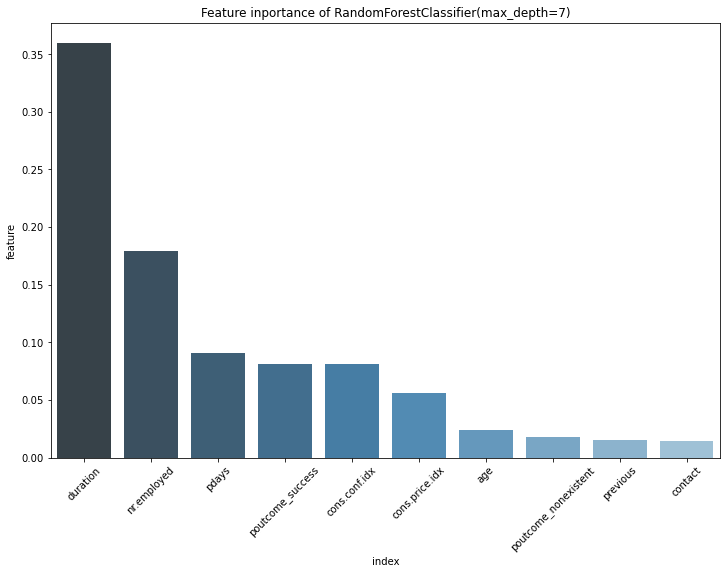

In [51]:
build_feature_importance(rf, x_train, y_train)

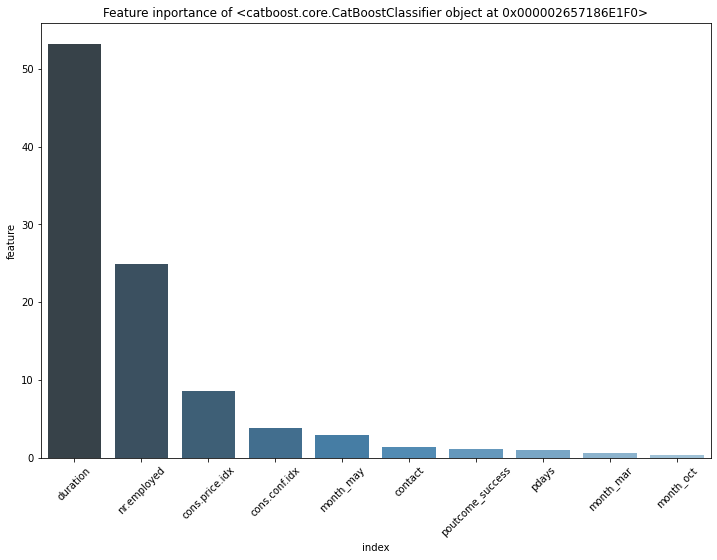

In [52]:
build_feature_importance(cb, x_train, y_train)

In [53]:
data = pd.read_csv('C:\\Users\\Muhammad Hazim\\Desktop\\bank-additional-full.csv', sep = ';')

In [54]:
data.y = data.y.map({'yes':1, 'no':0})

In [58]:
data[['month','y']].groupby(['month'], as_index = False).mean().sort_values(by = 'y', ascending = False)

,month,y
5,mar,0.505495
2,dec,0.489011
9,sep,0.449123
8,oct,0.438719
0,apr,0.204787
1,aug,0.106021
4,jun,0.105115
7,nov,0.101439
3,jul,0.090466
6,may,0.064347


In [62]:
data.pdays = data.pdays.replace(999,0)

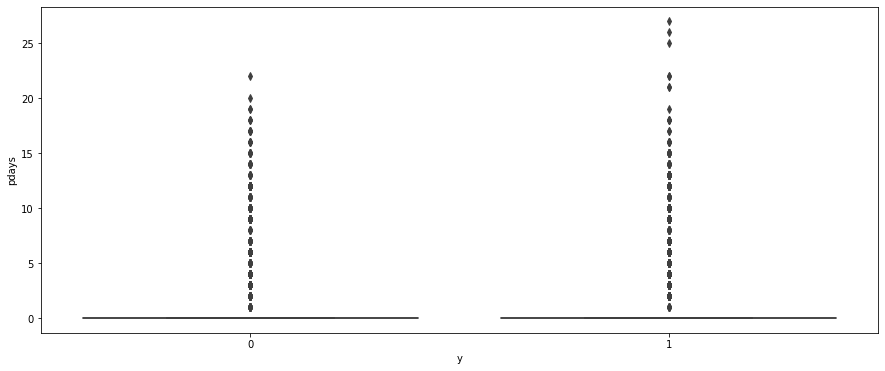

In [63]:
plt.figure(figsize = (15,6))
sns.boxplot(data['y'],data['pdays'])

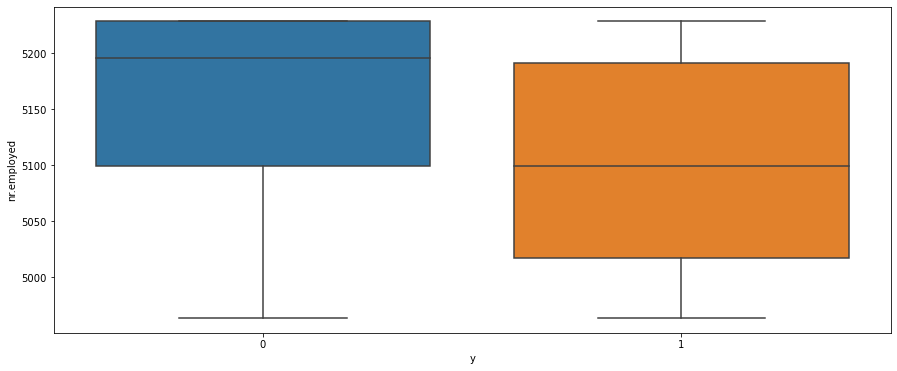

In [64]:
plt.figure(figsize = (15,6))
sns.boxplot(data['y'],data['nr.employed'])

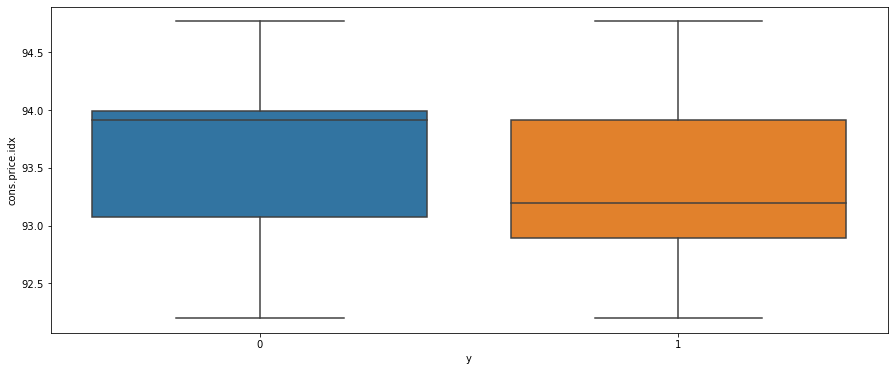

In [65]:
plt.figure(figsize = (15,6))
sns.boxplot(data['y'],data['cons.price.idx'])

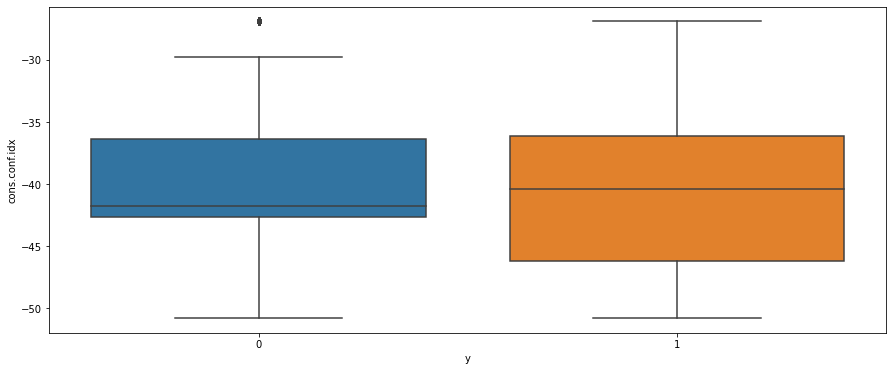

In [66]:
plt.figure(figsize = (15,6))
sns.boxplot(data['y'],data['cons.conf.idx'])

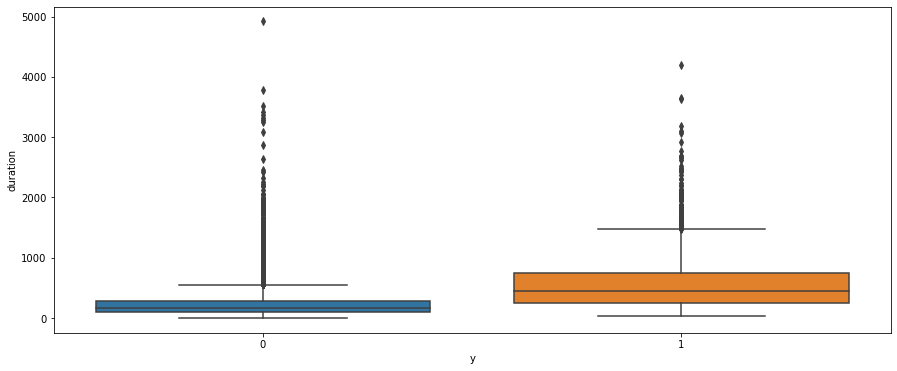

In [67]:
plt.figure(figsize = (15,6))
sns.boxplot(data['y'],data['duration'])